# Ultimate Take Home Challenge


## Step 1: EDA

The logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15-minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data file 
logins = pd.read_json('logins.json')

# examine df
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [4]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


There are 93,142 logins between January 1, 1970 and April 13, 1970 (~3.5 months). We can see that there are no null/missing values to deal with. There are three logins at the same exact time and date, but I don't know enough about the dataframe in question to know if this is supsect, but since there are about 1000 entries with the same date and time of login, it seems like three logins at the same time could be plausible, so I will leave these in the data.

In [5]:
logins = logins.set_index(['login_time'])

In [6]:
logins['count'] = 0

logins_15T = logins.resample('15T').count()
logins_15T = logins_15T.reset_index()
logins_15T.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


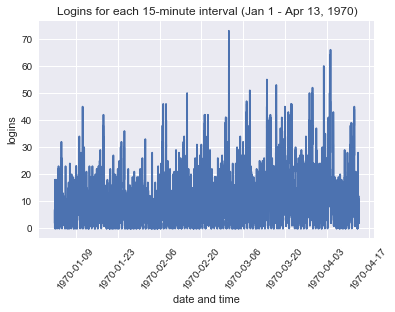

In [7]:
# plot all of the data

plt.plot(logins_15T['login_time'], logins_15T['count'])
plt.xticks(rotation = 50)
plt.xlabel('date and time')
plt.ylabel('logins')
plt.title('Logins for each 15-minute interval (Jan 1 - Apr 13, 1970)')
plt.show()

There are fairly regular spikes in logins. I wonder if there are increased logins on weekends as well as in the evenings. I will investigate further. 

In [8]:
# let's explore if these peaks are really higher on weekends 

logins_15T['day_of_week'] = logins_15T['login_time'].dt.dayofweek
weekday = logins_15T.sort_values(by='count', ascending=False)  

weekday = weekday[['day_of_week','count'] ]
weekday = weekday.groupby('day_of_week').sum().reset_index()

# rename days of week
weekday['day_of_week'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                               'Friday', 'Saturday', 'Sunday']

weekday

,day_of_week,count
0,Monday,8823
1,Tuesday,9268
2,Wednesday,10339
3,Thursday,11960
4,Friday,15208
5,Saturday,19377
6,Sunday,18167


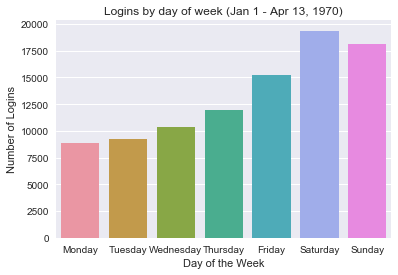

In [9]:
# visualize the data

sns.barplot(x = 'day_of_week', y = 'count', data = weekday)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Logins')
plt.title('Logins by day of week (Jan 1 - Apr 13, 1970)')
plt.show()

Logins go up over the course of the week. We see the highest number of logins on the weekend, especially on Saturday.

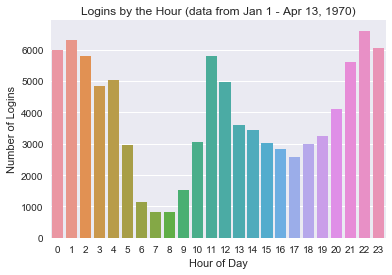

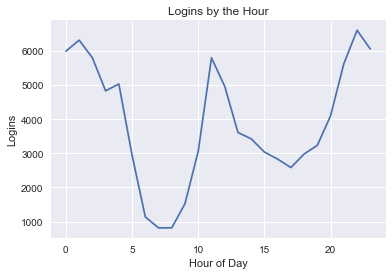

In [15]:
# I am also interested to see if there is a trend in when people are logging in
# Over the course of the day 
logins_15T['hour'] = logins_15T['login_time'].dt.hour
hours = logins_15T[['hour', 'count']]
hours = hours.groupby('hour').sum().reset_index()

# plot the data
sns.barplot(x='hour', y='count', data=hours)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.title('Logins by the Hour (data from Jan 1 - Apr 13, 1970)')
plt.show()

plt.plot(hours['hour'],hours['count'])
plt.xlabel('Hour of Day')
plt.ylabel('Logins')
plt.title('Logins by the Hour')
plt.show()


There are dips in logins between 5AM and 10AM, and a smaller dip from 3:30PM-7PM. These are approximately commuter hours -- most people are getting ready for work or commuting to or from work between these timeframes, which could result in the dip in logins. 

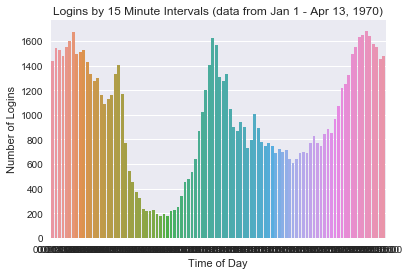

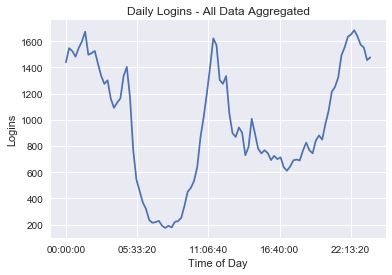

In [16]:
# Now let's dive back down into 15-minute intervals
logins_15T['new_time'] = [t.time() for t in logins_15T['login_time']]
fifteenMin = logins_15T[['new_time', 'count']]
fifteenMin = fifteenMin.groupby('new_time').sum().reset_index()

# plot the data
sns.barplot(x='new_time', y='count', data=fifteenMin)
plt.xlabel('Time of Day')
plt.ylabel('Number of Logins')
plt.title('Logins by 15 Minute Intervals (data from Jan 1 - Apr 13, 1970)')
plt.show()

plt.plot(fifteenMin['new_time'], fifteenMin['count'])
plt.xlabel('Time of Day')
plt.ylabel('Logins')
plt.title('Daily Logins - All Data Aggregated')
plt.show()

We see pretty much the same pattern here as with the hourly data. 

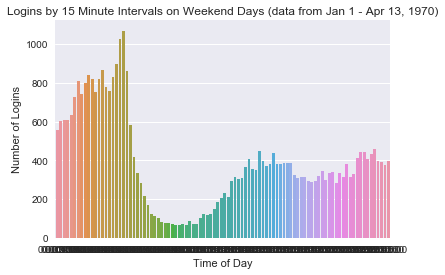

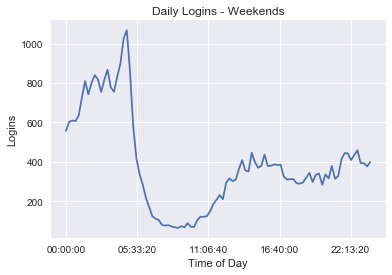

In [17]:
weekends = logins_15T[(logins_15T['day_of_week'] == 5) | (logins_15T['day_of_week'] == 6)]

weekends.head()
fifteenMin_wknd = weekends[['new_time', 'count']]
fifteenMin_wknd = fifteenMin_wknd.groupby('new_time').sum().reset_index()

sns.barplot(x='new_time', y='count', data=fifteenMin_wknd)
plt.xlabel('Time of Day')
plt.ylabel('Number of Logins')
plt.title('Logins by 15 Minute Intervals on Weekend Days (data from Jan 1 - Apr 13, 1970)')
plt.show()

plt.plot(fifteenMin_wknd['new_time'], fifteenMin_wknd['count'])
plt.xlabel('Time of Day')
plt.ylabel('Logins')
plt.title('Daily Logins - Weekends')
plt.show()

The distribution of logins on the weekend is pretty different than on all days. There are way more logins from midnight to about 4 AM, with a big dip in the morning hours from about 5AM to 1PM. Logins remain steady from then until midnight, when they do spike up.

When we look at all days, the number of logins is pretty high earlier in the evening. This makes me want to examine weekdays separately. 

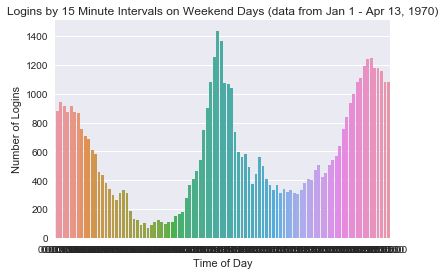

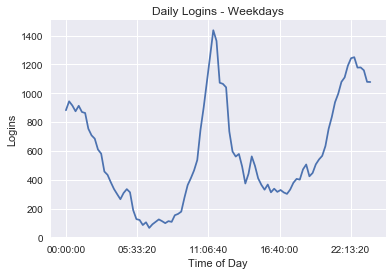

In [18]:
weekdays = logins_15T[logins_15T['day_of_week'] < 5]

weekends.head()
fifteenMin_wkdy = weekdays[['new_time', 'count']]
fifteenMin_wkdy = fifteenMin_wkdy.groupby('new_time').sum().reset_index()

sns.barplot(x='new_time', y='count', data=fifteenMin_wkdy)
plt.xlabel('Time of Day')
plt.ylabel('Number of Logins')
plt.title('Logins by 15 Minute Intervals on Weekend Days (data from Jan 1 - Apr 13, 1970)')
plt.show()

plt.plot(fifteenMin_wkdy['new_time'], fifteenMin_wkdy['count'])
plt.xlabel('Time of Day')
plt.ylabel('Logins')
plt.title('Daily Logins - Weekdays')
plt.show()

On weekdays, the number of logins spikes around the middle of the day (~11AM to 1PM), and then rises again at around 8PM, tapering off in the early hours of the night (steadily decreasing from 11PM onward)

The major conclusions I can pull from this data are:
1. On weekends, logins are high from 12AM to 4AM, with a dip in the early hours of the morning, and are fairly steady from 1PM onward.
2. On weekdays, logins are high around lunchtime and in the early evening (~8PM to midnight).
3. There are more logins on the weekend than on weekdays. Logins are lowest on Mondays and steadily climb to a peak, and then dip down again (but only slightly) on Sunday.

## Part 2: Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. Ultimately, we are looking to see if the company will make more money if they open up accessibility to both cities. The company might make more money as a result of this change because there will more driver availability and lower customer wait time. Therefore,t the key metric of success that I would choose to measure in this experiment is the total profit of all drivers after the reimbursement of their toll costs. It is important to measure profit after the reimbursement, because if the drivers make about the same amount of money as before, the company will be making less money than before due to the increased cost of drivers who travelled between cities. 

2. I would test whether or not total profits (after toll reimbursement) would rise or fall following the change in company policy to reimburse drivers for the toll costs. In order to do so, I would conduct an A/B test, where one group of drivers was reimbursed for their travel costs and another group of drivers would continue as normal. After several months of tracking profits in both groups, I would use a t-test to test for significance at 95% confidence (p = 0.05) a null hypothesis that the total profits (after the cost of the toll reimbursement) of the two groups of drivers is equal. If I get a p <= 0.05, I would reject this hypothesis, and find that one group is performing better than the other. If the group that is getting reimbursed for tolls is performing better, I would advise Ultimate to make this their standard policy. However, if the group that carried on with businesas usual is performing better, or if I find a p-value greater than 0.05 in my t-test, I would advise the company not to change anything. 

## Part 3: Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).



#### Data description
city: city this user signed up in

phone: primary device for this user

signup_date: date of account registration; in the form ‘YYYY MM DD’

last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

avg_dist: the average distance in miles per trip taken in the first 30 days after signup

avg_rating_by_driver: the rider’s average rating over all of their trips

avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

surge_pct: the percent of trips taken with surge multiplier > 1

avg_surge: The average surge multiplier over all of this user’s trips

trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

weekday_pct: the percent of the user’s trips occurring during a weekday


In [21]:
# read in dataframe

import json

file = open('ultimate_data_challenge.json', 'r')
retention_df = pd.DataFrame(json.load(file))
file.close()
retention_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [22]:
# examine data

retention_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


Max avg_dist and max trips_in_first_30_days look pretty high.

In [23]:
# look for missing data

retention_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [24]:
print(retention_df.phone.unique())
print(len(retention_df.loc[retention_df['phone'] == 'iPhone']))
# since most users were iphone users, I will fill in missing values with iphone
retention_df['phone'].fillna('iPhone', inplace=True)


['iPhone' 'Android' None]
34582


There are null values for avg_rating_by_driver and avg_rating_of_driver. I think that most people who don't rate their drivers or get rated are average. I will therefore fill in the missing values with the averages.

I also need to change the trip dates/sign up dates to date-times.

In [25]:
# impute missing ratings
retention_df['avg_rating_by_driver'].fillna(retention_df['avg_rating_by_driver'].mean(), inplace=True)
retention_df['avg_rating_of_driver'].fillna(retention_df['avg_rating_of_driver'].mean(), inplace=True)



In [26]:
#convert to dt

retention_df['last_trip_date'] = pd.to_datetime(retention_df['last_trip_date'])
retention_df['signup_date'] = pd.to_datetime(retention_df['signup_date'])

### Data Visualization

In [27]:
# examine how phone affects ridership

phone = retention_df[['trips_in_first_30_days', 'phone']].groupby('phone').sum().reset_index()
phone

,phone,trips_in_first_30_days
0,Android,29067
1,iPhone,84843


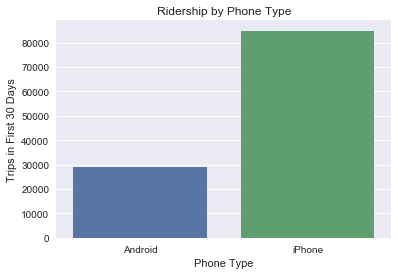

In [28]:
# create a plot
sns.barplot(x='phone', y='trips_in_first_30_days', data=phone)
plt.ylabel('Trips in First 30 Days')
plt.xlabel('Phone Type')
plt.title('Ridership by Phone Type')
plt.show()

In [29]:
# examine ridership by city
city = (retention_df[['trips_in_first_30_days', 'city']].groupby('city').sum().reset_index())
city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


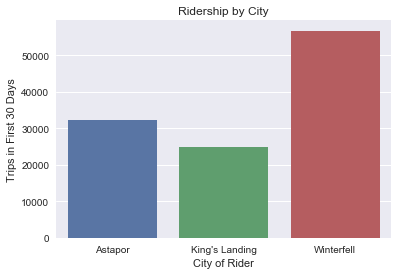

In [30]:
# make a bar plot
sns.barplot(x='city', y='trips_in_first_30_days', data=city)
plt.ylabel('Trips in First 30 Days')
plt.xlabel('City of Rider')
plt.title('Ridership by City')
plt.show()

In [31]:
# find most recent trip

retention_df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [32]:
# if someone has taken a trip in the last 30 days, they are considered active. 
active_users = retention_df[retention_df['last_trip_date'] >= '2014-06-01 00:00:00']
print(len(active_users))

# if someone hasen't taken a trip in the last 30 days, they are not considered active.
inactive_users = retention_df[retention_df['last_trip_date'] < '2014-06-01 00:00:00']
print(len(inactive_users))

# total users
total_users = len(retention_df['last_trip_date'])
print(total_users)

# fraction of active users
print(len(active_users)/total_users)

18804
31196
50000
0.37608


In [34]:
retention_df['retained'] = np.nan
retention_df.loc[retention_df['last_trip_date'] >= '2014-06-01', 'retained'] = int(1)
retention_df.loc[retention_df['last_trip_date'] < '2014-06-01', 'retained'] = int(0)
retention_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [35]:
phone2 = retention_df[['retained', 'phone']].groupby('phone').sum().reset_index()
phone2

# the number of total Android and iphone users is also important 

phone_type = retention_df[['retained', 'phone']].groupby('phone').count()
phone_type

phone2['pct_retained'] = [(3146/15022)*100, (15658/34978)*100]

phone2


,phone,retained,pct_retained
0,Android,3146.0,20.942617
1,iPhone,15658.0,44.765281


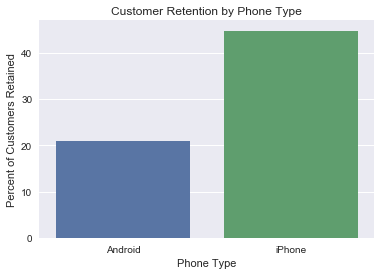

In [36]:
sns.barplot(x='phone', y='pct_retained', data=phone2)
plt.ylabel('Percent of Customers Retained')
plt.xlabel('Phone Type')
plt.title('Customer Retention by Phone Type')
plt.show()

In [37]:
city2 = (retention_df[['retained', 'city']].groupby('city').sum().reset_index())
print(city2)

city_count =  retention_df[['retained', 'city']].groupby('city').count()
print(city_count)



city2['pct_retained'] = [(4228/16534) * 100, (6363/10130)*100, (8213 / 23336) *100]
city2

             city  retained
0         Astapor    4228.0
1  King's Landing    6363.0
2      Winterfell    8213.0
                retained
city                    
Astapor            16534
King's Landing     10130
Winterfell         23336


,city,retained,pct_retained
0,Astapor,4228.0,25.571550
1,King's Landing,6363.0,62.813425
2,Winterfell,8213.0,35.194549


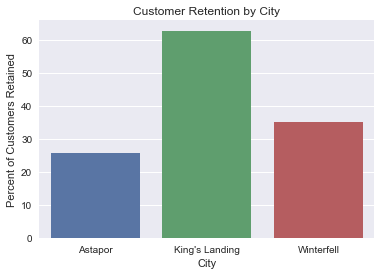

In [38]:
sns.barplot(x='city', y='pct_retained', data=city2)
plt.ylabel('Percent of Customers Retained')
plt.xlabel('City')
plt.title('Customer Retention by City')
plt.show()

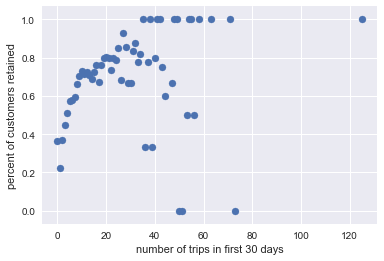

In [39]:
trips_in_first_30 = (retention_df[['retained', 'trips_in_first_30_days']].groupby('trips_in_first_30_days').sum().reset_index())
trips_in_first_30

trips_in_first_30_2 = (retention_df[['retained', 'trips_in_first_30_days']].groupby('trips_in_first_30_days').count().reset_index())

trips_in_first_30['pct_retained'] = trips_in_first_30['retained'] / trips_in_first_30_2['retained']
trips_in_first_30
plt.scatter(trips_in_first_30['trips_in_first_30_days'], trips_in_first_30['pct_retained'])
plt.xlabel('number of trips in first 30 days')
plt.ylabel('percent of customers retained')

In [40]:
# examine ultimate black users

ub = (retention_df[['retained', 'ultimate_black_user']].groupby('ultimate_black_user').sum().reset_index())
ub

ub2 = (retention_df[['retained', 'ultimate_black_user']].groupby('ultimate_black_user').count().reset_index())
ub2

ub['pct_retained'] = ub['retained'] / ub2['retained']
ub

,ultimate_black_user,retained,pct_retained
0,False,9307.0,0.298818
1,True,9497.0,0.503713


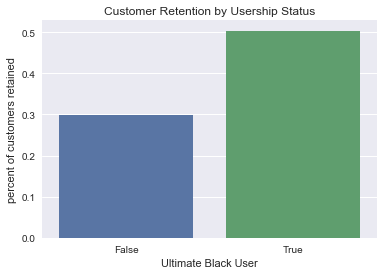

In [41]:
sns.barplot(x='ultimate_black_user', y='pct_retained', data=ub)
plt.xlabel('Ultimate Black User')
plt.ylabel('percent of customers retained')
plt.title('Customer Retention by Usership Status')
plt.show()

In [43]:
# everybody signed up in January, so looking at our definition of retention will work well enough
# For people retained in their sixth month 
# Machine learning
from sklearn.model_selection import train_test_split

retention_ml = retention_df[['city', 'phone', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                            'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct',
                            'retained']]
retention_ml = pd.get_dummies(retention_ml, columns = ['city', 'phone', 'ultimate_black_user'])



In [44]:
# define inputs for Machine Learning
x = retention_ml.drop(['retained'], axis=1)
y = retention_ml['retained']

In [45]:
# build a simple model 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

0.7652
[[5337  869]
 [1479 2315]]


In [47]:
positive, negative = confusion
tn, fp = positive
fn, tp = negative
print('True Positives:', tp)
print('True Negatives:', tn)
print('False Positives:', fp)
print('False Negatives:', fn)

True Positives: 2315
True Negatives: 5337
False Positives: 869
False Negatives: 1479


The model is 76.52% accurate, and there aren't too many false positives or false negatives.

In [48]:
# That was slow - i will try a naive bayes classifier 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [49]:
accuracy_nb = accuracy_score(y_test, y_pred)
print(accuracy_nb)
confusion_nb = confusion_matrix(y_test, y_pred)
print(confusion_nb)

0.7152
[[4769 1392]
 [1456 2383]]


This model is 71.5% accurate, but it is way faster than the SVC classifier. There are also fewer false positives, which is good for not over-predicting retention; here, it might be best to air on the side of caution in that sense.